In [1]:
import pandas as pd
from datetime import datetime
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce

%matplotlib inline

## Dataset for Austin TX  from 2013 to 2022

In [2]:
austin_dataset = pd.read_csv('../data/Austin_Animal_Center_Outcomes.csv')
austin_dataset

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
...,...,...,...,...,...,...,...,...,...,...,...,...
142484,A862977,NaN,08/03/2022 02:07:00 PM,Aug 2022,07/30/2022,Transfer,Partner,Dog,Intact Female,4 days,Pit Bull,Black/White
142485,A862978,NaN,08/03/2022 02:07:00 PM,Aug 2022,07/30/2022,Transfer,Partner,Dog,Intact Male,4 days,Pit Bull,Black/White
142486,A862760,A862760,08/03/2022 02:54:00 PM,Aug 2022,06/30/2022,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Tortie
142487,A862446,NaN,08/03/2022 02:57:00 PM,Aug 2022,06/19/2022,Transfer,Partner,Cat,Intact Female,1 month,Domestic Shorthair,Torbie


In [3]:
austin_dataset.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [4]:
austin_dataset.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,142489,100617,142489,142489,142489,142466,65363,142489,142487,142450,142489,142489
unique,127518,24467,118395,107,7689,11,26,5,5,54,2769,621
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,633,39,2244,119,65410,34367,79940,50028,24418,32926,14866


### separate column month and year

In [5]:
austin_dataset[['MonthYear', 'Year']] = austin_dataset['MonthYear'].str.split(' ', 1, expand=True)
austin_dataset = austin_dataset.rename(columns= {'MonthYear': 'Month'})
austin_dataset

,Animal ID,Name,DateTime,Month,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year
0,A794011,Chunk,05/08/2019 06:20:00 PM,May,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2019
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,2018
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,2020
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,2016
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142484,A862977,NaN,08/03/2022 02:07:00 PM,Aug,07/30/2022,Transfer,Partner,Dog,Intact Female,4 days,Pit Bull,Black/White,2022
142485,A862978,NaN,08/03/2022 02:07:00 PM,Aug,07/30/2022,Transfer,Partner,Dog,Intact Male,4 days,Pit Bull,Black/White,2022
142486,A862760,A862760,08/03/2022 02:54:00 PM,Aug,06/30/2022,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Tortie,2022
142487,A862446,NaN,08/03/2022 02:57:00 PM,Aug,06/19/2022,Transfer,Partner,Cat,Intact Female,1 month,Domestic Shorthair,Torbie,2022


## ajusting the "Age upon Outcome" column into years only

In [6]:
austin_dataset['Date of Birth'] = pd.to_datetime(austin_dataset['Date of Birth'])
austin_dataset['DateTime'] = austin_dataset['DateTime'].apply(pd.Timestamp)
austin_dataset = austin_dataset[austin_dataset.Year != '2013']
austin_dataset = austin_dataset[austin_dataset.Year != '2014']
austin_dataset

,Animal ID,Name,DateTime,Month,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year
0,A794011,Chunk,2019-05-08 18:20:00,May,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2019
1,A776359,Gizmo,2018-07-18 16:02:00,Jul,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,2018
2,A821648,NaN,2020-08-16 11:38:00,Aug,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,2020
3,A720371,Moose,2016-02-13 17:59:00,Feb,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,2016
5,A659412,Princess,2020-10-05 14:37:00,Oct,2013-03-24,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142484,A862977,NaN,2022-08-03 14:07:00,Aug,2022-07-30,Transfer,Partner,Dog,Intact Female,4 days,Pit Bull,Black/White,2022
142485,A862978,NaN,2022-08-03 14:07:00,Aug,2022-07-30,Transfer,Partner,Dog,Intact Male,4 days,Pit Bull,Black/White,2022
142486,A862760,A862760,2022-08-03 14:54:00,Aug,2022-06-30,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Tortie,2022
142487,A862446,NaN,2022-08-03 14:57:00,Aug,2022-06-19,Transfer,Partner,Cat,Intact Female,1 month,Domestic Shorthair,Torbie,2022


In [7]:
austin_dataset['Age'] = (austin_dataset['DateTime'] - austin_dataset['Date of Birth'])
austin_dataset['Age'] = round(((austin_dataset['Age'].dt.days)/365), 0)
austin_dataset['Breeds'] = austin_dataset['Breed'].str.replace(' Mix', '')
austin_dataset

,Animal ID,Name,DateTime,Month,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year,Age,Breeds
0,A794011,Chunk,2019-05-08 18:20:00,May,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2019,2.0,Domestic Shorthair
1,A776359,Gizmo,2018-07-18 16:02:00,Jul,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,2018,1.0,Chihuahua Shorthair
2,A821648,NaN,2020-08-16 11:38:00,Aug,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,2020,1.0,Raccoon
3,A720371,Moose,2016-02-13 17:59:00,Feb,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,2016,0.0,Anatol Shepherd/Labrador Retriever
5,A659412,Princess,2020-10-05 14:37:00,Oct,2013-03-24,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,2020,8.0,Chihuahua Shorthair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142484,A862977,NaN,2022-08-03 14:07:00,Aug,2022-07-30,Transfer,Partner,Dog,Intact Female,4 days,Pit Bull,Black/White,2022,0.0,Pit Bull
142485,A862978,NaN,2022-08-03 14:07:00,Aug,2022-07-30,Transfer,Partner,Dog,Intact Male,4 days,Pit Bull,Black/White,2022,0.0,Pit Bull
142486,A862760,A862760,2022-08-03 14:54:00,Aug,2022-06-30,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Tortie,2022,0.0,Domestic Shorthair
142487,A862446,NaN,2022-08-03 14:57:00,Aug,2022-06-19,Transfer,Partner,Cat,Intact Female,1 month,Domestic Shorthair,Torbie,2022,0.0,Domestic Shorthair


### Outcome types count by year

In [8]:
outcome = austin_dataset.groupby(['Year','Outcome Type']).count()
outcome = outcome.reset_index()
outcome = outcome[['Year','Outcome Type', 'Animal ID']]
outcome = outcome.rename(columns= {'Animal ID':' Outcome Type Count'}).sort_values('Year', ascending= True)
outcome 

,Year,Outcome Type,Outcome Type Count
0,2015,Adoption,7377
1,2015,Died,185
2,2015,Disposal,24
3,2015,Euthanasia,1466
4,2015,Missing,14
...,...,...,...
65,2022,Lost,1
66,2022,Relocate,1
67,2022,Return to Owner,731
68,2022,Rto-Adopt,95


## #########################################################################

# ADOPTION

## animals adoption

In [9]:
adopt_df = austin_dataset[(austin_dataset['Outcome Type'] == 'Adoption') + 
                          (austin_dataset['Outcome Type'] == 'Return to Owner') + 
                          (austin_dataset['Outcome Type'] == 'Relocate') + 
                          (austin_dataset['Outcome Type'] == 'Rto-Adopt')]
adopt_df

,Animal ID,Name,DateTime,Month,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year,Age,Breeds
0,A794011,Chunk,2019-05-08 18:20:00,May,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2019,2.0,Domestic Shorthair
1,A776359,Gizmo,2018-07-18 16:02:00,Jul,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,2018,1.0,Chihuahua Shorthair
3,A720371,Moose,2016-02-13 17:59:00,Feb,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,2016,0.0,Anatol Shepherd/Labrador Retriever
5,A659412,Princess,2020-10-05 14:37:00,Oct,2013-03-24,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown,2020,8.0,Chihuahua Shorthair
6,A814515,Quentin,2020-05-06 07:59:00,May,2018-03-01,Adoption,Foster,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown,2020,2.0,American Foxhound/Labrador Retriever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142449,A861955,*Bonnet,2022-08-02 09:40:00,Aug,2020-07-20,Adoption,NaN,Dog,Spayed Female,2 years,Labrador Retriever Mix,Tan,2022,2.0,Labrador Retriever
142462,A843523,*Chewy,2022-01-22 16:51:00,Jan,2019-10-02,Rto-Adopt,NaN,Dog,Neutered Male,2 years,American Bulldog,White,2022,2.0,American Bulldog
142464,A862727,Bella,2022-08-03 11:14:00,Aug,2016-08-02,Return to Owner,NaN,Dog,Intact Female,6 years,Chihuahua Shorthair,Blue Merle,2022,6.0,Chihuahua Shorthair
142465,A862041,*Comet,2022-08-01 16:07:00,Aug,2022-02-21,Adoption,NaN,Dog,Neutered Male,5 months,Australian Cattle Dog Mix,Blue Merle/White,2022,0.0,Australian Cattle Dog


In [10]:
adopt_pets = adopt_df.groupby(['Animal Type']).count()
adopt_pets = adopt_pets.reset_index()
adopt_pets = adopt_pets[['Animal Type', 'Animal ID']].rename(columns= {'Animal ID':'Adopted Total Count'})
adopt_pets = adopt_pets.sort_values("Adopted Total Count", ascending = False)
adopt_pets

,Animal Type,Adopted Total Count
2,Dog,50564
1,Cat,25020
4,Other,768
0,Bird,274
3,Livestock,14


## Adoption pets by year

In [11]:
adopt_pets_year = adopt_df[(adopt_df['Animal Type'] == 'Dog')]
adopt_pets_year = adopt_pets_year.groupby(['Year','Animal Type']).count().rename(columns= {'Animal ID':'Adopted Animal Count'})
adopt_pets_year = adopt_pets_year.reset_index()
adopt_pets_year = adopt_pets_year.drop(columns= {'Name', 'DateTime','Month', 'Date of Birth','Outcome Type', 'Outcome Subtype','Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color', 'Age', 'Breeds'})
adopt_pets_year = adopt_pets_year.sort_values("Year", ascending = True)
adopt_pets_year

,Year,Animal Type,Adopted Animal Count
0,2015,Dog,7627
1,2016,Dog,7811
2,2017,Dog,7668
3,2018,Dog,7578
4,2019,Dog,8411
5,2020,Dog,4084
6,2021,Dog,4711
7,2022,Dog,2674


# adopted dog breeds

In [12]:
dog_breed_1 = adopt_df[adopt_df['Animal Type'] == 'Dog']
adopt_dog_breed = dog_breed_1.groupby(['Breeds']).count().sort_values('Animal ID', ascending = False)
adopt_dog_breed = adopt_dog_breed.reset_index()
adopt_dog_breed = adopt_dog_breed[['Breeds', 'Animal ID']].rename(columns= {'Animal ID':'Adopted Breed Count'})
adopt_dog_breed

,Breeds,Adopted Breed Count
0,Pit Bull,7345
1,Labrador Retriever,6014
2,Chihuahua Shorthair,4734
3,German Shepherd,3381
4,Australian Cattle Dog,1439
...,...,...
1711,Irish Terrier/Norfolk Terrier,1
1712,Black Mouth Cur/Golden Retriever,1
1713,Irish Wolfhound/Cardigan Welsh Corgi,1
1714,Irish Wolfhound/German Shepherd,1


## adopted dogs age (age is in years)

In [13]:
adopt_age_d = dog_breed_1.groupby(['Age']).count()
adopt_age_d = adopt_age_d.sort_values('Animal ID', ascending= False).reset_index()
adopt_age_d = adopt_age_d[['Age', 'Animal ID']].rename(columns= {'Animal ID': 'Adopted Age Count'})
adopt_age_d = adopt_age_d.drop([21, 22, 23])
adopt_age_d

,Age,Adopted Age Count
0,1.0,13159
1,2.0,10556
2,0.0,9853
3,3.0,4293
4,4.0,2667
5,5.0,2282
6,6.0,1526
7,7.0,1378
8,8.0,1300
9,10.0,933


## adopted cats age (age is in years)

In [14]:
cat_breed_1 = adopt_df[adopt_df['Animal Type'] == 'Cat']
adopt_age_f = cat_breed_1.groupby(['Age']).count()
adopt_age_f = adopt_age_f.sort_values('Animal ID', ascending= False).reset_index()
adopt_age_f = adopt_age_f[['Age', 'Animal ID']].rename(columns= {'Animal ID': 'Adopted Age Count'})
adopt_age_f

,Age,Adopted Age Count
0,0.0,15361
1,1.0,3526
2,2.0,2098
3,3.0,882
4,4.0,514
5,5.0,484
6,8.0,358
7,6.0,347
8,7.0,342
9,10.0,277


## ##########################################################################

# EUTHANASIA

## Types of animals euthanized 

In [15]:
euthanized_df = austin_dataset[(austin_dataset['Outcome Type'] == 'Euthanasia') + (austin_dataset['Outcome Type'] == 'Disposal') + (austin_dataset['Outcome Type'] == 'Died')]
euthanized_df

,Animal ID,Name,DateTime,Month,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year,Age,Breeds
2,A821648,NaN,2020-08-16 11:38:00,Aug,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,2020,1.0,Raccoon
17,A773792,NaN,2018-06-05 15:30:00,Jun,2018-05-05,Euthanasia,Suffering,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Orange Tabby,2018,0.0,Domestic Shorthair
19,A725795,NaN,2016-05-03 12:39:00,May,2016-04-15,Euthanasia,Underage,Other,Unknown,2 weeks,Opossum,Gray,2016,0.0,Opossum
27,A766700,NaN,2018-02-15 08:59:00,Feb,2017-02-15,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat Mix,Brown,2018,1.0,Bat
33,A765701,NaN,2018-01-25 09:39:00,Jan,2017-01-25,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat Mix,Brown,2018,1.0,Bat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142424,A858998,*Makaio,2022-08-01 17:00:00,Aug,2022-04-20,Euthanasia,Suffering,Cat,Neutered Male,3 months,Domestic Shorthair,Brown Tabby,2022,0.0,Domestic Shorthair
142431,A862455,Marble,2022-08-02 16:07:00,Aug,2020-07-26,Euthanasia,Suffering,Cat,Intact Female,2 years,Domestic Shorthair,Calico,2022,2.0,Domestic Shorthair
142440,A651306,Mason,2022-08-02 18:37:00,Aug,2011-04-08,Euthanasia,Suffering,Dog,Neutered Male,11 years,Rottweiler,Black/Tan,2022,11.0,Rottweiler
142450,A862975,A862975,2022-08-03 08:56:00,Aug,2022-06-27,Euthanasia,Suffering,Cat,Intact Male,NaN,Domestic Longhair,Black Tabby/Brown,2022,0.0,Domestic Longhair


In [16]:
euth_pets = euthanized_df.groupby(['Animal Type']).count()
euth_pets = euth_pets.reset_index()
euth_pets = euth_pets[['Animal Type', 'Animal ID']].rename(columns= {'Animal ID':'Euthanized Total Count'})
euth_pets = euth_pets.sort_values("Euthanized Total Count", ascending = False)
euth_pets

,Animal Type,Euthanized Total Count
4,Other,4640
1,Cat,2471
2,Dog,1463
0,Bird,179
3,Livestock,3


In [17]:
euth_pets_year = euthanized_df[(euthanized_df['Animal Type'] == 'Dog')]
euth_pets_year = euth_pets_year.groupby(['Year','Animal Type']).count().rename(columns= {'Animal ID':'Euthanized Animal Count'})
euth_pets_year = euth_pets_year.reset_index()
euth_pets_year = euth_pets_year.drop(columns= {'Name', 'DateTime','Month', 'Date of Birth','Outcome Type', 'Outcome Subtype','Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color', 'Age', 'Breeds'})
euth_pets_year = euth_pets_year.sort_values("Year", ascending = True)
euth_pets_year

,Year,Animal Type,Euthanized Animal Count
0,2015,Dog,455
1,2016,Dog,223
2,2017,Dog,129
3,2018,Dog,113
4,2019,Dog,188
5,2020,Dog,135
6,2021,Dog,132
7,2022,Dog,88


# euthanized dog breed

In [18]:
dog_breed_2 = euthanized_df[euthanized_df['Animal Type'] == 'Dog']
euth_dog_breed = dog_breed_2.groupby(['Breeds']).count().sort_values('Animal ID', ascending = False)
euth_dog_breed = euth_dog_breed.reset_index()
euth_dog_breed = euth_dog_breed[['Breeds', 'Animal ID']].rename(columns= {'Animal ID':'Euthanized Breed Count'})
euth_dog_breed

,Breeds,Euthanized Breed Count
0,Pit Bull,337
1,Chihuahua Shorthair,181
2,Labrador Retriever,147
3,German Shepherd,80
4,Rottweiler,32
...,...,...
188,Dachshund/Beagle,1
189,Collie Smooth/German Shepherd,1
190,Collie Smooth/Chow Chow,1
191,Chihuahua Shorthair/Rat Terrier,1


## euthanized dogs age (age is in years)

In [41]:
euth_age_d = dog_breed_2.groupby(['Age']).count()
euth_age_d = euth_age_d.sort_values('Animal ID', ascending= False).reset_index()
euth_age_d = euth_age_d[['Age', 'Animal ID']].rename(columns= {'Animal ID': 'Euthanized Age Count'})
euth_age_d

,Age,Euthanized Age Count
0,0.0,298
1,2.0,264
2,1.0,171
3,3.0,123
4,4.0,86
5,5.0,85
6,10.0,74
7,8.0,54
8,6.0,52
9,12.0,46


## euthanized cats age (age is in years)

In [20]:
cat_breed_2 = euthanized_df[euthanized_df['Animal Type'] == 'Cat']
euth_age_f = cat_breed_2.groupby(['Age']).count()
euth_age_f = euth_age_f.sort_values('Animal ID', ascending= False).reset_index()
euth_age_f = euth_age_f[['Age', 'Animal ID']].rename(columns= {'Animal ID': 'Euthanized Age Count'})
euth_age_f = euth_age_f.iloc[:-1] #drops last row
euth_age_f

,Age,Euthanized Age Count
0,0.0,1191
1,2.0,360
2,1.0,299
3,3.0,94
4,5.0,92
5,10.0,69
6,8.0,60
7,12.0,57
8,4.0,54
9,6.0,38


## #########################################################################

# Merging dataframes

In [21]:
merge_pets_total_austin = pd.merge(euth_pets, adopt_pets, on= 'Animal Type', how= 'outer')
merge_pets_total_austin['Animal Type'] = merge_pets_total_austin['Animal Type'].replace(['Other', 'Cat', 'Dog', 'Bird', 'Livestock'],['WILDLIFE', 'CAT', 'DOG', 'BIRD', 'LIVESTOCK'])
merge_pets_total_austin

,Animal Type,Euthanized Total Count,Adopted Total Count
0,WILDLIFE,4640,768
1,CAT,2471,25020
2,DOG,1463,50564
3,BIRD,179,274
4,LIVESTOCK,3,14


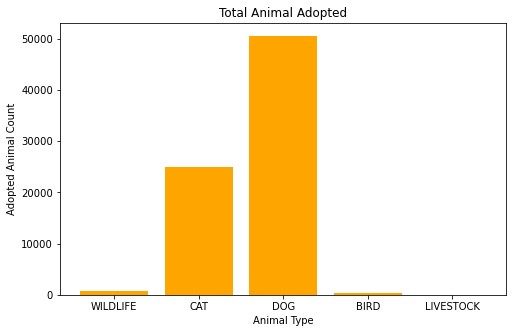

In [22]:
plt.figure(figsize=(8,5))
plt.bar('Animal Type', 'Adopted Total Count', data = merge_pets_total_austin, color = 'orange')
plt.xlabel('Animal Type')
plt.ylabel('Adopted Animal Count')
plt.title('Total Animal Adopted');

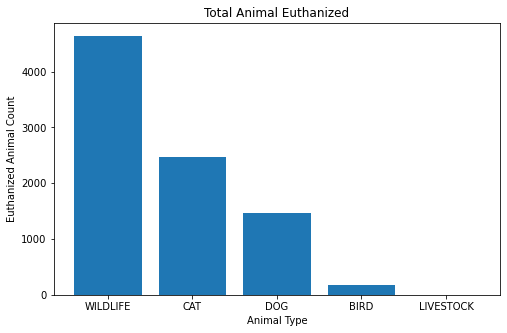

In [23]:
plt.figure(figsize=(8,5))
plt.bar('Animal Type', 'Euthanized Total Count', data = merge_pets_total_austin)
plt.xlabel('Animal Type')
plt.ylabel('Euthanized Animal Count')
plt.title('Total Animal Euthanized');

In [24]:
## Merging ags for cats
austin_merge_age_cat = pd.merge(euth_age_f, adopt_age_f, on= 'Age', how= 'outer')
austin_merge_age_cat 

,Age,Euthanized Age Count,Adopted Age Count
0,0.0,1191,15361
1,2.0,360,2098
2,1.0,299,3526
3,3.0,94,882
4,5.0,92,484
5,10.0,69,277
6,8.0,60,358
7,12.0,57,123
8,4.0,54,514
9,6.0,38,347


In [25]:
# 'Other' animal type were wild animals like Raccoons, Bats, Skunks, Foxes, Squirrels, and Opossums

In [26]:
## explain why you decided to add other values besides Euthanasia and adoption for the calculations
## also explain why you did not use the values for on the 'Transfer' column
## mention the outcome types and why you did not use them all

In [27]:
merge_age_austin = pd.merge(euth_age_d, adopt_age_d, on = 'Age', how= 'outer')
merge_age_austin = merge_age_austin.dropna()
merge_age_austin

,Age,Euthanized Age Count,Adopted Age Count
0,0.0,298.0,9853.0
1,2.0,264.0,10556.0
2,1.0,171.0,13159.0
3,3.0,123.0,4293.0
4,4.0,86.0,2667.0
5,5.0,85.0,2282.0
6,10.0,74.0,933.0
7,8.0,54.0,1300.0
8,6.0,52.0,1526.0
9,12.0,46.0,426.0


In [28]:
merge_dogs_austin = pd.merge(euth_dog_breed, adopt_dog_breed, on= 'Breeds', how= 'outer')
merge_dogs_austin

,Breeds,Euthanized Breed Count,Adopted Breed Count
0,Pit Bull,337.0,7345.0
1,Chihuahua Shorthair,181.0,4734.0
2,Labrador Retriever,147.0,6014.0
3,German Shepherd,80.0,3381.0
4,Rottweiler,32.0,471.0
...,...,...,...
1734,Irish Terrier/Norfolk Terrier,NaN,1.0
1735,Black Mouth Cur/Golden Retriever,NaN,1.0
1736,Irish Wolfhound/Cardigan Welsh Corgi,NaN,1.0
1737,Irish Wolfhound/German Shepherd,NaN,1.0


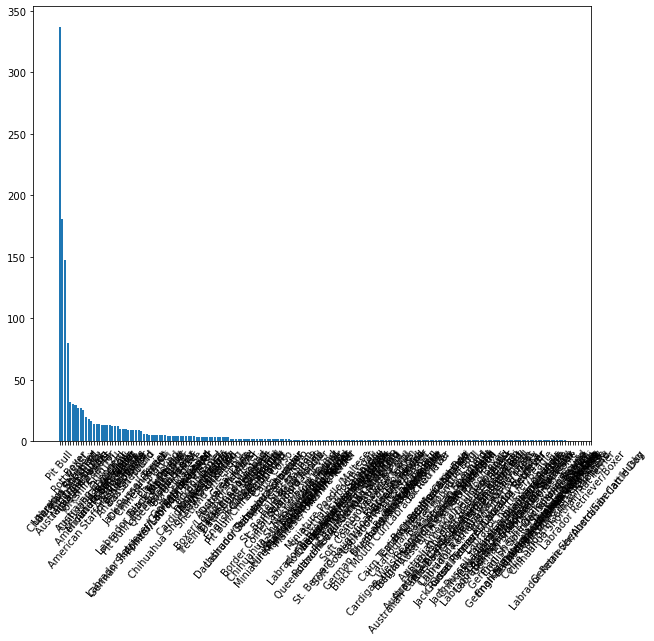

In [29]:
plt.figure(figsize=(10,8))
plt.bar('Breeds', 'Euthanized Breed Count', data = merge_dogs_austin)
plt.xticks(rotation= 50);

In [30]:
## explain why did you chose the full breed names rather than the mix breed names...

In [31]:
#adopted dogs and cats by year
merge_pets_year_austin = pd.merge(euth_pets_year, adopt_pets_year, on= ('Year', 'Animal Type'), how= 'outer')
merge_pets_year_austin['Animal Type'] = merge_pets_year_austin['Animal Type'].replace(['Dog'],['DOG'])
merge_pets_year_austin

,Year,Animal Type,Euthanized Animal Count,Adopted Animal Count
0,2015,DOG,455,7627
1,2016,DOG,223,7811
2,2017,DOG,129,7668
3,2018,DOG,113,7578
4,2019,DOG,188,8411
5,2020,DOG,135,4084
6,2021,DOG,132,4711
7,2022,DOG,88,2674


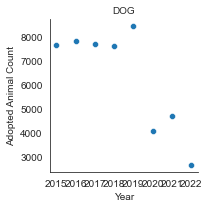

In [32]:
sns.set_style('white')
m = sns.FacetGrid(merge_pets_year_austin, col='Animal Type')
m.map_dataframe(sns.scatterplot, x='Year', y='Adopted Animal Count')
m.set_titles(col_template='{col_name}');

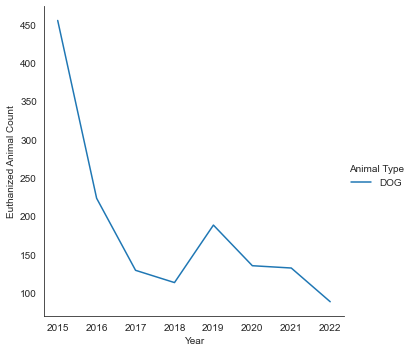

In [33]:
sns.relplot(data = merge_pets_year_austin, x = 'Year', y = 'Euthanized Animal Count', kind = 'line', hue = 'Animal Type');

In [34]:
merge_pets_total_austin.to_csv('../data/merge_pets_total_austin.csv', index=False)

In [42]:
merge_age_austin.to_csv('../data/merge_age_austin.csv', index= False)

In [36]:
merge_dogs_austin.to_csv('../data/merge_dogs_austin.csv', index= False)

In [37]:
merge_pets_year_austin.to_csv('../data/merge_pets_year_austin.csv', index=False)